# Tutorias - Testes de Hipóteses
## Estatística para Ciência de Dados 
### 17/05/2021 e 20/05/2021

Luna Wagner e Maria Blanco



Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

Função scipy stats para valores da distribuição normal - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/


**Revisão do teste para média** (simples)

Vamos rever o exemplo dado em aula, mas sem a simulação de Monte Carlo.

Uma fábrica anuncia que o índice de nicotina dos cigarros de uma dada marca é igual a 20 mg por cigarro. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de nicotina dos cigarros dessa marca se distribui normalmente com variância 4 mg$^2$. Pode-se aceitar a afirmação do fabricante, ao nível de 5%?

Primeiro definimos as hipóteses que queremos testar ao nível $\alpha = 0,05$ de significância:


$H_0: \mu = 20$<br>
$H_1: \mu > 20$

Atribuímos os dados do problema: lista de observações X, $\alpha$, $\mu$ e $\sigma^2$

In [2]:
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21]

mu = 20

sigma2 = 4

alpha = 0.05

E então calculamos a média observada e o valor crítico

In [3]:
xobs = np.mean(X)

xc = stats.norm(mu, np.sqrt(sigma)).ppf((1-alpha))

Obs: estamos usando a função que retorna a probabilidade acumulada e, por ser um teste lateral á direita, devemos calcular o percentil 1-$\alpha$

Agora basta comparar os valores e concluir

In [4]:
print('Xc=',xc,'  Xobs = ', xobs)
if(xobs < xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Xc= 23.289707253902943   Xobs =  20.45
Aceitamos H0


## Valor p

Referências: http://www.portalaction.com.br/inferencia/512-calculo-e-interpretacao-do-p-valor

Como ficaria se analisássemos pelo valor p?

Neste caso, o valor p é probabilidade de X, sob $H_0$, ser maior que a média observada. 

In [5]:
valor_p = 1 - stats.norm(mu, np.sqrt(sigma)).cdf(xobs)
valor_p

0.41098963713127046

E concluímos

In [6]:
print('Valor p=',valor_p,'  alpha = ', alpha)
if(alpha < valor_p):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Valor p= 0.41098963713127046   alpha =  0.05
Aceitamos H0


# Exercícios de fixação

**1)** Uma fábrica anuncia que o índice de nicotina dos cigarros de uma dada marca é igual a 20 mg por cigarro. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de nicotina dos cigarros dessa marca se distribui normalmente com variância 4 mg 2 . 

Pode-se aceitar a afirmação do fabricante, ao nível de 10% e 1%?


 *Vamos primeiro definir as hipóteses:*

$H_0: \mu = 20$

$H_1: \mu > 20$

*Temos que*

$\sigma ^2 = 4$

*E os dados:*

In [15]:
x1 = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21]
n1 = len(x1)
mu1 = 20
var = 4

In [16]:
x_obs_barr1 = np.mean(x1)
x_obs_barr1

20.45

In [17]:
alpha_1 = 0.01
alpha_10 = 0.1


xc_1 = stats.norm(20, 2).ppf((1- alpha_1))

xc_10 = stats.norm(20, 2).ppf((1- alpha_10))

print('Xc para 0.01 =',xc_1,'\n', 'Xc para 0.1 =',xc_10, '\n', 'Xobs = ', xobs)

Xc para 0.01 = 24.652695748081683 
 Xc para 0.1 = 22.5631031310892 
 Xobs =  20.45


**O que podemos concluir olhando para os diferentes valores críticos e a média observada?**

E se olharmos para valor p?

In [18]:
valor_p1 = 1 - stats.norm(mu1, np.sqrt(var)).cdf(x_obs_barr1)
valor_p1

0.41098963713127046

**2)** Um pesquisador deseja estudar o efeito de certa substância no tempo de reação de seres vivos a um certo tipo de estímulo. Um experimento é desenvolvido com cobaias, que são inoculadas com a substância e submetidas a um estímulo elétrico, com seus tempos de reação (em segundos) anotados. Os seguintes valores foram obtidos:
T = [9,1;9,3;7,2;13,3;10,9;7,2;9,9;8,0;8,6;7,5]<br>
Admite-se que, em geral,  o tempo de reação tem distribuição Normal com média 8 segundos e desvio padrão 2 segundos. Entretanto, o pesquisador desconfia que o tempo médio sofre um aumento, por influência da substância. Verifique a nível 2% se o tempo de reação das cobaias submetidas à substância foi aumentado.

Queremos testas as hipóteses:


$H_0: \mu = 8 $

$H_1: \mu > 8 $

Ao nível de significância $\alpha = 0,02$

Temos os dados:

In [11]:
T = [9.1,9.3,7.2,13.3,10.9,7.2,9.9,8.0,8.6,7.5]

mu_t = 8

dp_t = 2

alpha_t = 0.02

E calculamos a média observada de T e o valor crítico

In [12]:
t_obs = np.mean(T)

tc = stats.norm(mu_t, dp_t).ppf((1-alpha_t))

print('Tc=', tc,' e  Tobs = ', t_obs)
if( t_obs > tc):
    print("Rejeitamos H0")
else:
    print("Aceitamos H0")

Tc= 12.107497821263646  e  Tobs =  9.1
Aceitamos H0


Valor p

In [13]:
valor_p_t = 1 - stats.norm(mu_t, dp_t).cdf(t_obs)

Conclusão

In [14]:
print('Valor p=',valor_p_t,'  alpha = ', alpha_t)
if(alpha_t < valor_p_t):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Valor p= 0.29115968678834636   alpha =  0.02
Aceitamos H0


## Exercício 3 de fixação

Considere a base de dados da flor iris. Realize a seleção de atributos usando teste de hipóteses. Use o classificador Naive Bayes e verifique se o erro na classificação diminui quando usamos 2 atributos selecionados.

Dados da flor Iris disponível em datasets do sklearn: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [20]:
iris = datasets.load_iris()
X3 = iris.data 
y = iris.target

In [21]:
X3.shape

(150, 4)

Vamos fazer uma breve visualização das 4 variáveis e as classes

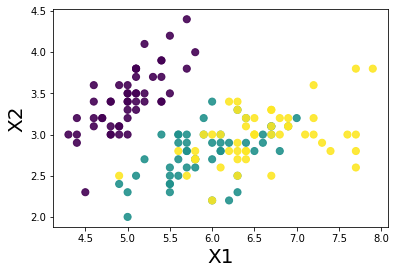

In [22]:
plt.scatter(X3[:,0], X3[:,1], cmap='viridis',  c=y, s=50, alpha=0.9)
plt.xlabel('X1', fontsize=20)
plt.ylabel('X2', fontsize=20)
plt.show(True)

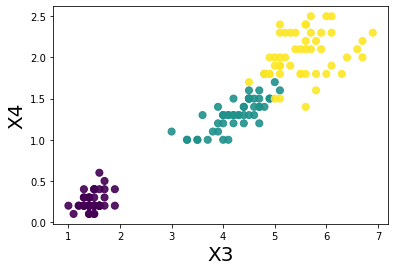

In [23]:
plt.scatter(X3[:,2], X3[:,3], c=y, cmap='viridis', s=50, alpha=0.9)
plt.xlabel('X3', fontsize=20)
plt.ylabel('X4', fontsize=20)
plt.show(True)

Vamos fazer a classificação usando todo o conjunto de dados.

In [24]:
from sklearn.model_selection import train_test_split
p = 0.25 
x_train, x_test, y_train, y_test = train_test_split(X3, y, test_size = p, random_state = 2)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9736842105263158


In [25]:
print("Número de pontos classificados incorretamente",(y_test != y_pred).sum(),'do total de', x_test.shape[0])

Número de pontos classificados incorretamente 1 do total de 38


Para realizar a seleção dos atributos, usamos Anova (https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia), que usa o teste de hipóteses. 

Para cada covariável vamos testar se há diferença estatística entre as 3 classes da flor Iris. Neste caso, como há mais de dois tipos, é utilizado a ANOVA para teste de comparações múltiplas, como melhor detalhado em: http://www.portalaction.com.br/anova/teste-de-comparacoes-multiplas

Por exemplo, para a variável 1, testamos:

$H_0: \mu_1 = \mu_2 = \mu_3$

$H_1: \mu_i \neq \mu_j$

Se rejeitamos a hipótese nula, isso significa que pelo menos duas médias diferem entre si e, portanto, é interessante utilizar tal atributo na nossa classificação. Note que, se não rejeitamos H0, a utilização dessa variável não acrescenta na distinção entre as classes.

Este método de seleção de variáveis não depende do método de classificação utilizado, pois leva em consideração apenas a relação das covariáveis com o target.

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


fvalue_selector = SelectKBest(f_classif, k=2)

X_kbest = fvalue_selector.fit_transform(X3, y)

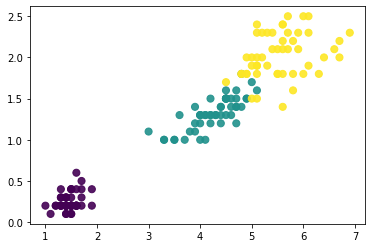

In [27]:
plt.scatter(X_kbest[:,0], X_kbest[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

Vamos verificar como ficou a acurácia só com as 2 variáveis escolhidas

In [28]:
from sklearn.model_selection import train_test_split
p = 0.25
x_train, x_test, y_train, y_test = train_test_split(X_kbest, y, test_size = p, random_state = 2)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9736842105263158


In [29]:
print("Número de pontos classificados incorretamente",(y_test != y_pred).sum(),'do total de', x_test.shape[0])

Número de pontos classificados incorretamente 1 do total de 38


## Exemplo de teste de hipóteses

http://www.portalaction.com.br/inferencia/52-teste-para-media-teste-t

Um engenheiro de produção quer testar, com base nos dados da tabela a seguir, e para um nível de significância $\alpha$=0,05, se a altura média de uma haste está próxima do valor nominal de 1055 mm sabendo que o desvio padrão é de 90 mm.  Uma amostra de 20 hastes foi analisada as medidas obtidas são dadas a seguir.

Observações = (903,88;	1036,92;	1098,04;	1011,26;
1020,70;	915,38;	1014,53;	1097,79;
934,52;	1214,08;	993,45;	1120,19;
860,41;	1039,19;	950,38;	941,83;
936,78;	1086,98;	1144,94;	1066,12)


 *Vamos primeiro definir as hipóteses:*

$H_0: \mu = 1055$

$H_1: \mu \neq 1055 $

*Temos que*

$\alpha = 0.05$

$\sigma  = 90$

In [30]:
w = [903.88, 1036.92, 1098.04, 1011.26, 1020.70, 915.38, 1014.53, 1097.79, 934.52, 1214.08, 993.45, 1120.19, 860.41, 1039.19, 950.38, 941.83, 936.7, 1086.98, 1144.94, 1066.12]

alpha_w = 0.05

mu_w = 1055

dp_w = 90

nw = len(w)

Logo, teremos que a estatística observada é 

In [31]:
w_obs = np.mean(w)
w_obs

1019.3644999999999

E os valores críticos são dados por:

In [32]:
wc_1 = stats.norm(mu_w, dp_w).ppf((alpha_w/2))
wc_2 = stats.norm(mu_w, dp_w).ppf(1-(alpha_w/2))

In [33]:
print("Portanto, NÃO rejeitamos H0 se a altura média observada estiver entre ", wc_1, " e ", wc_2, " ao nível ", alpha_w,"de significância")

Portanto, NÃO rejeitamos H0 se a altura média observada estiver entre  878.6032413913952  e  1231.3967586086048  ao nível  0.05 de significância


E para a amostra observada temos:

In [34]:
print('Wc1=', wc_1,' e  Wc2 = ', wc_2, '\n Altura média observada = ',w_obs)
if( (w_obs< wc_1) | (w_obs >wc_2)):
    print("Rejeitamos H0")
else:
    print("Aceitamos H0")

Wc1= 878.6032413913952  e  Wc2 =  1231.3967586086048 
 Altura média observada =  1019.3644999999999
Aceitamos H0


Valor p

In [35]:
valor_p_w = 2 * min(stats.norm(mu_w, dp_w).cdf(w_obs),1 - stats.norm(mu_w, dp_w).cdf(w_obs) )
valor_p_w

0.6921419142768478

## Como interpretamos esse resultado no contexto do problema?

## Testes para comparação de médias 
http://www.portalaction.com.br/inferencia/571-comparacao-de-medias-variancias-iguais




Podemos estar interessados em testar se dois experimentos geraram resultados divergentes, podemos fazer isso checando se a média de duas amostras são significativamente diferentes.

$H_0: \mu_a = \mu_b$

$H_1: \mu_a \neq \mu_b$


In [36]:
a = [2,3,4,3,5,6] # amostra a
b = [5,7,8,8,5,6] # amostra b
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-3.2391053207156637, pvalue=0.00888286699136881)